# Project: Investigate a Dataset - TMDB 5000 Movie

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be analyzing data associated with informations on title, genre, runtime, production companies, release date, release year, popularity, revenue, vote count and more. Those informations are about 10,0000 movies collected from Movies database (TMDb). This dataset contains 10866 rows and 21 columns.

### Questions for Analysis

In this project we will answering the following questions:

1 - Has the number of movies released per year changed over the year? Which year has the most number of movie releases? Which month has seen the most number of movies releases?

2 - Which are the movies with the highest and lowest profits? What are the top 10 most profitable movies?

3 - What are the most popular genre over the years?

4 - Which production companies have produced the most films?

5 - Which directors have directed most movies? Who is the director with the most number of movies?

<a id='wrangling'></a>
## Data Wrangling
### Import Important libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import and read the dataset

In [129]:
df = pd.read_csv('tmdb-movies.csv')

In [130]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Get informations about the dataset

In [131]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [132]:
df.shape

(10866, 21)

In [133]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that the minimum runtime of a movie in this dataset is equal to 0 minutes and the maximum runtime of a movie in this dataset is equal to 900 minutes. the first year where a movie was released is 1960 and the latest movie was released on 2015.

We have some missed values on this database in those columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

### Data Cleaning
At this stage, we are going to drope some columns that we are not going to use to answer the above question. Those columns are: home page, imdb_id, cast, tagline, budget_adj, and revenue_adj. 

In [135]:
df = df.drop(columns = ['imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'])

In [136]:
df.describe()

,id,budget,revenue,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,66064.177434,1.462570e+07,3.982332e+07,2001.322658
std,92130.136561,3.091321e+07,1.170035e+08,12.812941
min,5.000000,0.000000e+00,0.000000e+00,1960.000000
25%,10596.250000,0.000000e+00,0.000000e+00,1995.000000
50%,20669.000000,0.000000e+00,0.000000e+00,2006.000000
75%,75610.000000,1.500000e+07,2.400000e+07,2011.000000
max,417859.000000,4.250000e+08,2.781506e+09,2015.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10866 non-null  int64 
 1   budget                10866 non-null  int64 
 2   revenue               10866 non-null  int64 
 3   original_title        10866 non-null  object
 4   director              10822 non-null  object
 5   genres                10843 non-null  object
 6   production_companies  9836 non-null   object
 7   release_date          10866 non-null  object
 8   release_year          10866 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 764.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis
Now that we have trimmed and cleaned our data, we are ready to move on to exploration. At this stage, we will be computing statistics and create visualizations so we can get answers to the above questions mentionned in the introduction section.
We will walk throught all the quetions one by one in the following sections.
###  1 -  Has the number of movies released per year changed over the year? Which year has the most number of movie releases? Which month has seen the most number of movies releases?

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


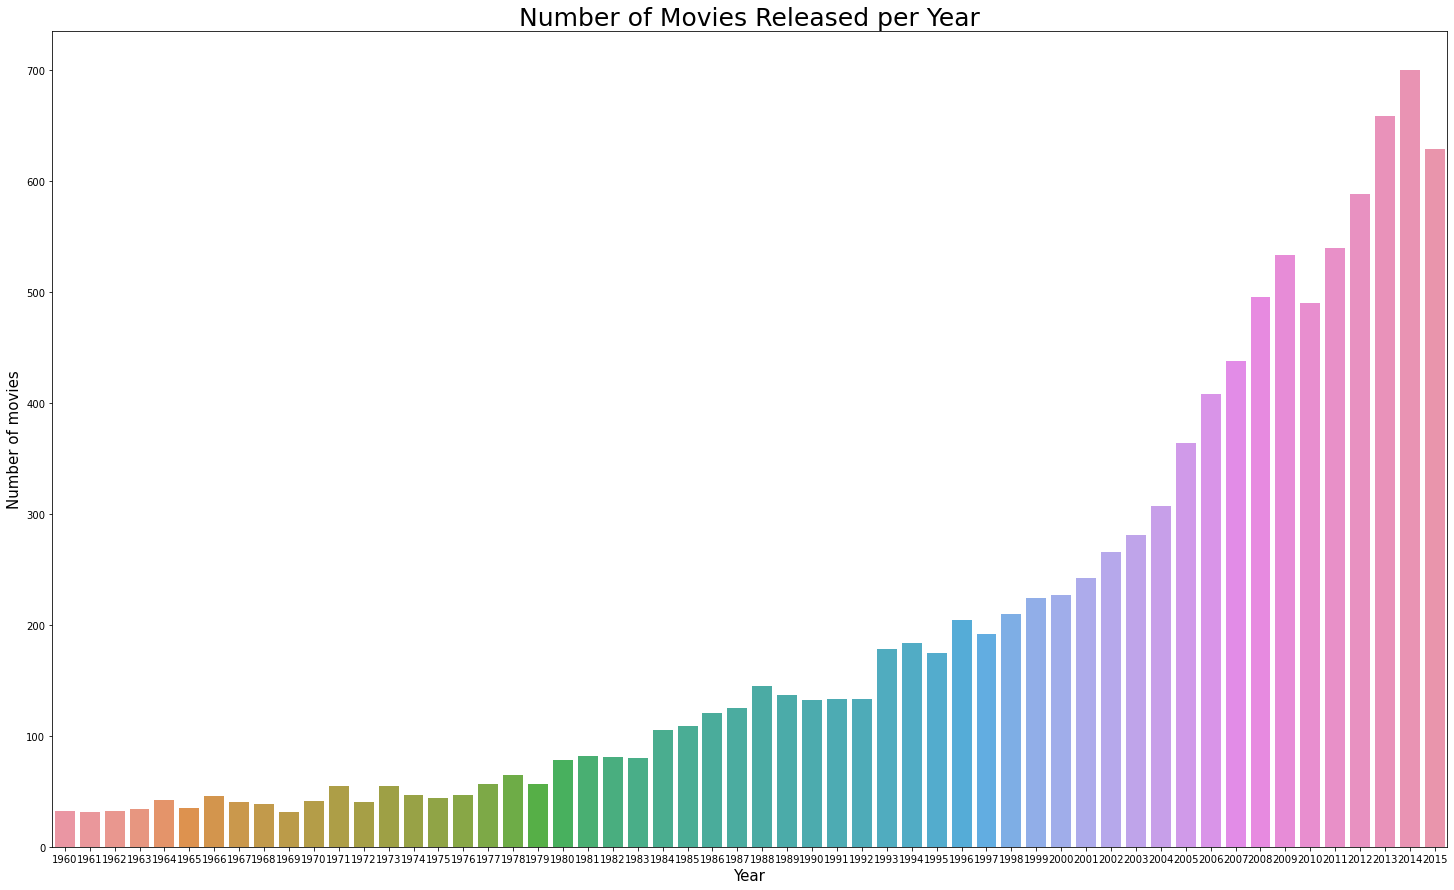

In [138]:
plt.figure(figsize = (25,15))
sns.countplot(df['release_year'])
plt.title('Number of Movies Released per Year', fontsize = 25)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.show()

The above graph shows us that the number of movies releases inscrease during the years. On 2014, we get the highest number of movies releases.

In [139]:
print('In 2014 {} movies have been released'.format(df['release_year'][df['release_year'] == 2014].count()))

In 2014 700 movies have been released


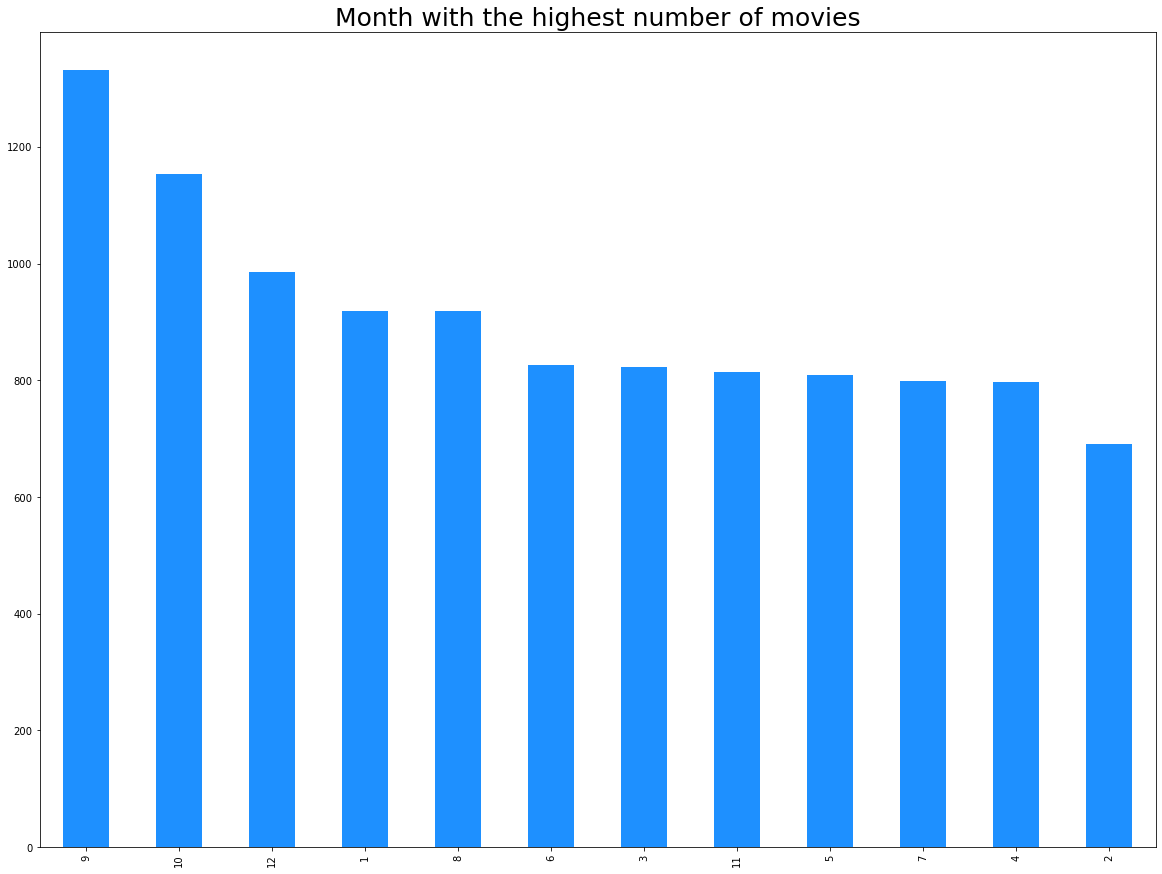

In [140]:
df['release_date'] = pd.to_datetime(df['release_date'])
plt.figure(figsize = (20,15))
df['release_date'].dt.month.value_counts().plot.bar(color = 'dodgerblue')
plt.title('Month with the highest number of movies', fontsize = 25)
plt.show()

The above bar chart shows us that September is the month with the highest number of movies. September got over 1200 movies releases. We also can see that February is the month with the lowest number of movies releases, it got only around 800 movies releases.

### 2- Which are the movies with the highest and lowest profits? What are the top 10 most profitable movies?

In [141]:
df['profit'] = df['revenue']-df['budget']

We added a new column to the database that presents the profit.

In [142]:
print(df.original_title[df['profit'] == df['profit'].max()])

1386    Avatar
Name: original_title, dtype: object


**Avatr** is the movie with the highest profit.

In [143]:
print(df.original_title[df['profit'] == df['profit'].min()])

2244    The Warrior's Way
Name: original_title, dtype: object


**The Warrior's Way** is the movie with the lowest profit.

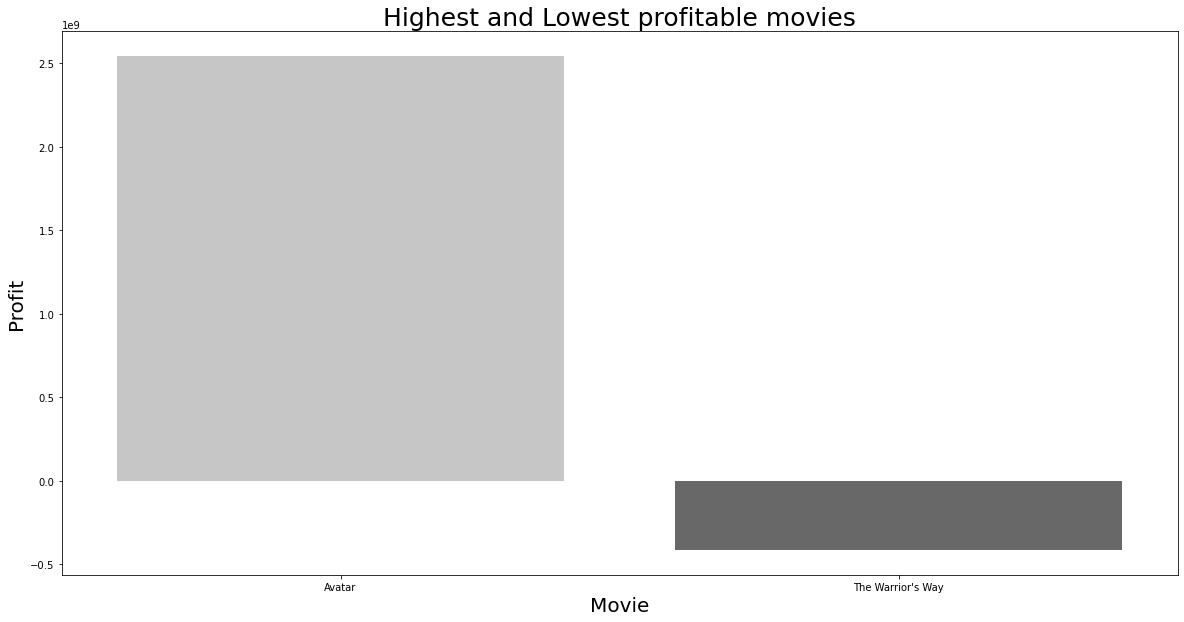

In [144]:
plt.figure(figsize = (20,10))
dd = df[(df.profit == df['profit'].max())|(df.profit == df['profit'].min())]
sns.barplot(x = dd['original_title'],y = dd['profit'], palette = 'Greys')
plt.title('Highest and Lowest profitable movies', fontsize = 25)
plt.xlabel('Movie', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.show()

The above bar chart shows us that the highest profit is equaal to 25 and the lowest profit is equal to 0.

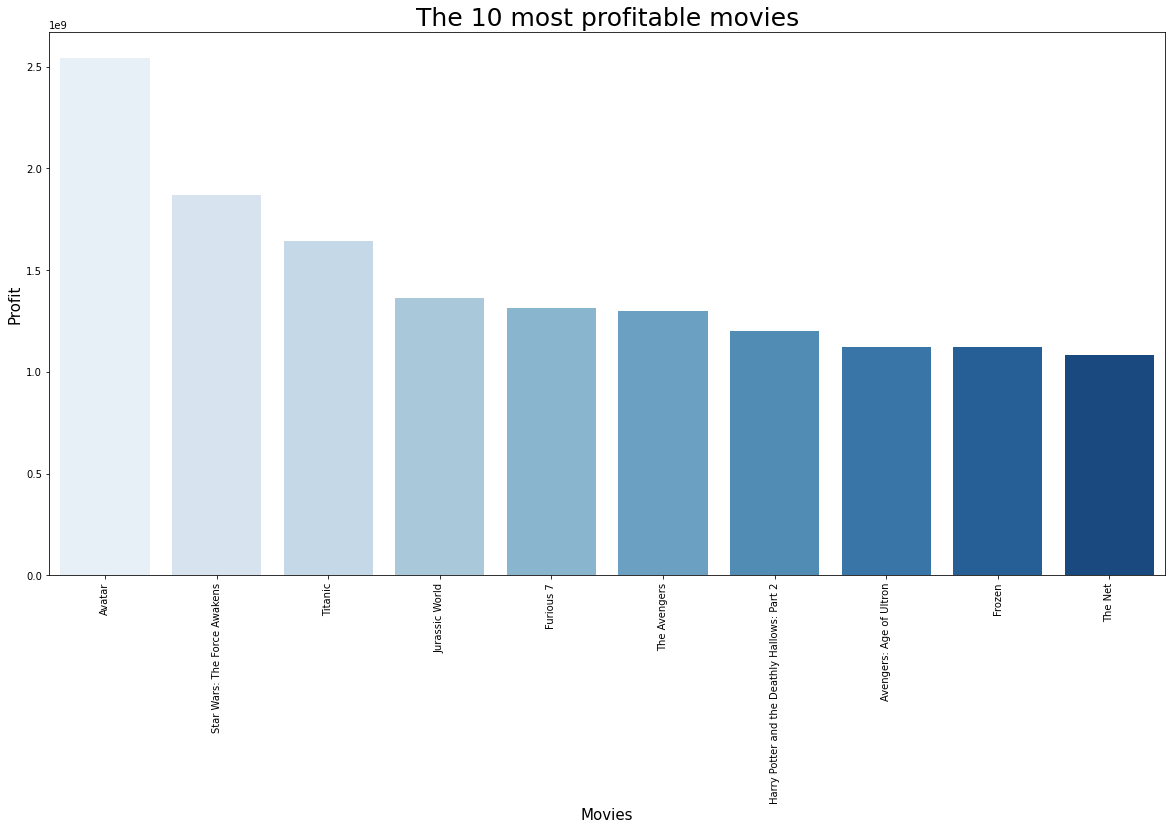

In [145]:
plt.figure(figsize=(20,10))
ds = df[['original_title','profit']].sort_values('profit', ascending = False).head(10)
sns.barplot(x = 'original_title', y = 'profit', data = ds, palette= 'Blues')
plt.title('The 10 most profitable movies', fontsize = 25)
plt.xlabel('Movies', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

These are the top 10 profitable movies from the given dataset.

### 3 - What are the most popular genre over the years?

In [146]:
dg = df['genres'].str.get_dummies(sep = '|')
dg1 = dg.sum().reset_index()

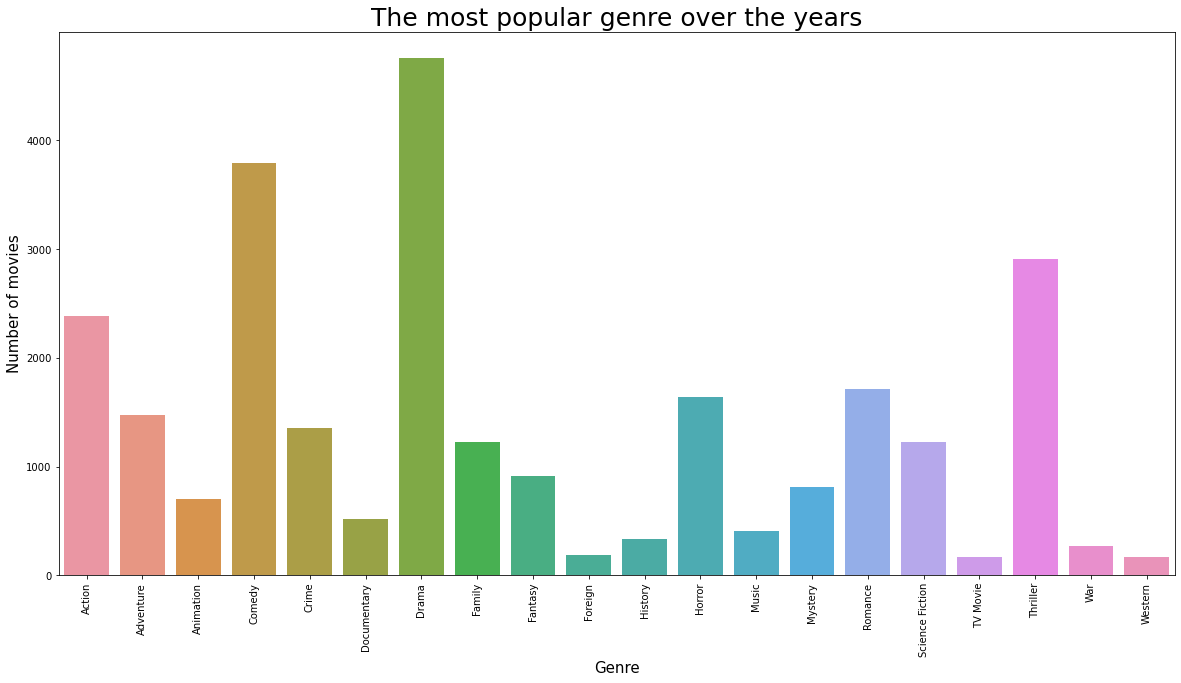

In [147]:
plt.figure(figsize = (20,10))
sns.barplot(x = dg.columns, y = dg.sum(), data = dg1)
plt.title('The most popular genre over the years', fontsize = 25)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Number of movies', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

The most popular genres over the years are **Drama, Comedy, Thriller, and Action**.

### 4 - Which production companies have produced the most films?

In [148]:
dp = df['production_companies'].str.get_dummies(sep = '|')
dpc = dp[dp.columns].apply(lambda x:sum(x.values))

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_2988/1207798896.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  dpc.sort_values(0, ascending = False).head(15).plot.pie(autopct = '%1.1f%%', frame = True)


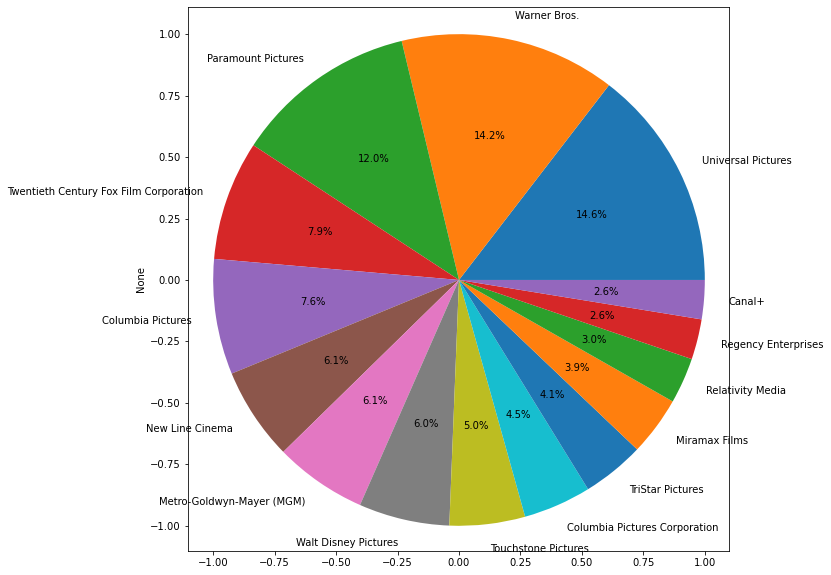

In [149]:
plt.figure(figsize = (10,10))
dpc.sort_values(0, ascending = False).head(15).plot.pie(autopct = '%1.1f%%', frame = True)
plt.show()

The pie gives us the top 15 production companies. The top 5 production companies are Universal Picture (14.6%), Warner Bros (14.2%), Paramount Pictures (12.0%), twentieth Century Fox Film Corporation (7.9%) and Columbia Pictures (7.6%).

### 5 - Which directors have directed most movies? Who is the director with the most number of movies?

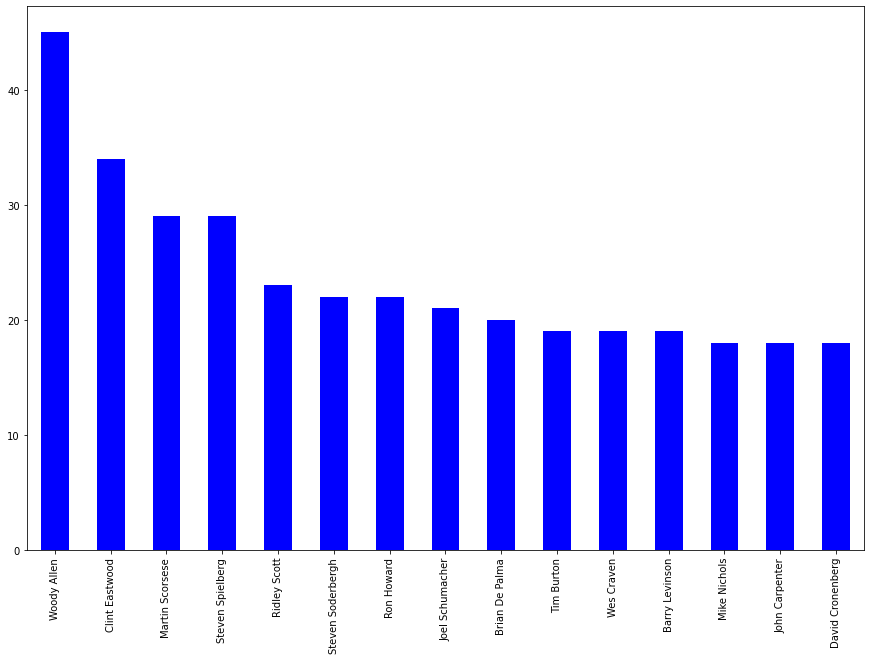

In [150]:
plt.figure(figsize = (15,10))
df['director'].value_counts().head(15).plot.bar(color = 'Blue')
plt.show()

The above bar char showcase the top 15 directors with the highest number of movies.

In [151]:
df['director'][df['director']=='Woody Allen'].count()

45

Woody Allen is the director with the highest number of movies. He has directed 45 movies from the given dataset.

<a id='conclusions'></a>
## Conclusions

> 1 - The number of movies releases inscrease during the years. On 2014, we get 700 movies rlease and that present the highest number of movies releases from 1960 to 2015. Also, September is the month with the highest number of movies. September got over 1200 movies releases. In addition, we can see that February is the month with the lowest number of movies releases, it got only around 800 movies releases.

> 2 - **Avatr** is the movie with the highest profit. **The Warrior's Way** is the movie with the lowest profit.

> 3 - The most popular genres over the years are **Drama, Comedy, Thriller, and Action**.

> 4 - The pie gives us the top 15 production companies. The top 5 production companies are Universal Picture (14.6%), Warner Bros (14.2%), Paramount Pictures (12.0%), twentieth Century Fox Film Corporation (7.9%) and Columbia Pictures (7.6%).

> 5 - Woody Allen is the director with the highest number of movies. He has directed 45 movies from the given dataset.

We still can use the runtime, keyword, tagline, and rating informations to see how long people put time to watch a movie and what they prefer and to classify movies based on the rating they get.